# Example: Training a GapNet

In this tutorial we will ...

## Initialization

In [1]:
import gapnet
import numpy as np

## Loading the dataset

In [2]:
# load dataset and fill in missing values
from numpy import load

X = load('data/X.npy') 
y = load('data/y.npy')

print("Number of features {}".format(X.shape[1]))
print("Number of subjects {}".format(X.shape[0]))

Number of features 40
Number of subjects 1000


The dataset includes several missing values

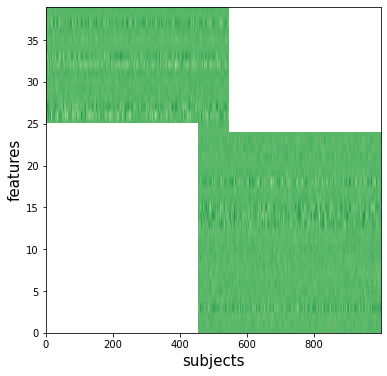

In [3]:
import matplotlib.pyplot as plt
from numpy import isnan


fig,ax = plt.subplots(figsize=(6,6))

ax.imshow(X.T, aspect='auto', cmap = plt.cm.Greens)

ax.set_xlabel("subjects", fontsize = 15)
ax.set_ylabel("features", fontsize = 15)

ax.set_xlim(0,X.shape[0]-1)
ax.set_ylim(0,X.shape[1]-1)

plt.show()

## Isolating the complete dataset

In [4]:
# The dataset with complete data
from numpy import isnan

X_overlap = X[~isnan(X).any(axis=1)]
y_overlap = y[~isnan(X).any(axis=1)]

print("The overlapping dataset includes {} subjects".format(X_overlap.shape[0]))

The overlapping dataset includes 100 subjects


## Generate the GapNet architecture

The input data are ...

In [5]:
gapnet_model = gapnet.generate_gapnet_model(cluster_sizes = [25,15], n_feature = X.shape[1],n_classes = 2)
gapnet_model.build_model(show_summary=True, n_dense = 5)

[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25)]         0           []                               
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 15)]         0           []                               
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 50)           1300        ['input_3[0][0]']                
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           4

## Train the GapNet model

In [6]:
num_trials = 5
for i in range(num_trials):
    i = i + 1
    print("Training process of trial #{} is starting...".format(i))
    X_train, y_train, X_test, y_test = gapnet.preprocess_with_missing_data(X,y)
    gapnet_model.train_first_stage(X_train, y_train, X_test, y_test)
    gapnet_model.train_second_stage(X_train, y_train, X_test, y_test)

Training process of trial #1 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process of second stage is done.
Training process of trial #2 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process of second stage is done.
Training process of trial #3 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process

In [7]:
gapnet.present_results(gapnet_model)

Results :
best_epochs [157, 96, 392, 245, 240]
train_accuracy 0.945+/-0.030 : [0.9   0.925 0.988 0.95  0.962]
val_accuracy 0.900+/-0.032 : [0.9  0.85 0.9  0.9  0.95]
val_auc 0.945+/-0.026 : [0.929 0.929 0.99  0.919 0.96 ]
val_sens 0.845+/-0.041 : [0.818 0.8   0.889 0.818 0.9  ]
val_spec 0.962+/-0.047 : [1.    0.9   0.909 1.    1.   ]
val_prec 0.956+/-0.054 : [1.    0.889 0.889 1.    1.   ]


## Plot the results

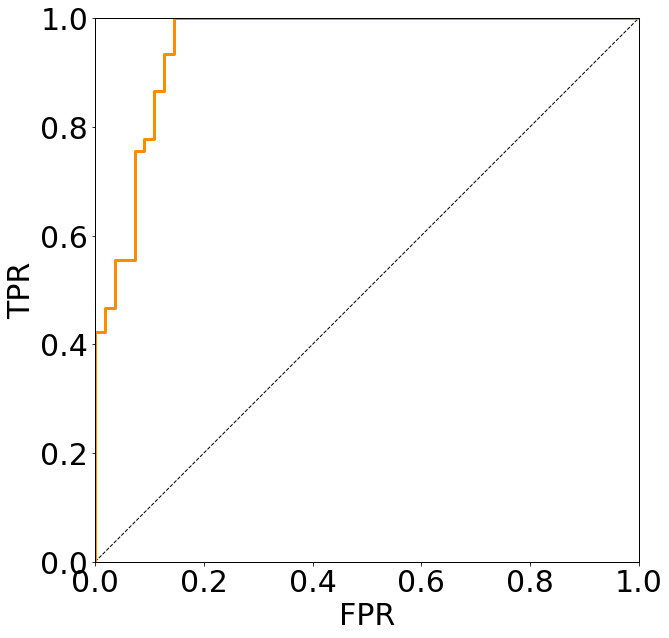

In [8]:
#test plot roc
gapnet.plot_roc_avg("gapnet", gapnet_model.val_y_labels, gapnet_model.val_y_preds, 1, linestyle='solid', color='darkorange')

Legitimate Transactions Detected (True Negatives):  47
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  2
Fraudulent Transactions Detected (True Positives):  43
Total Fraudulent Transactions:  45


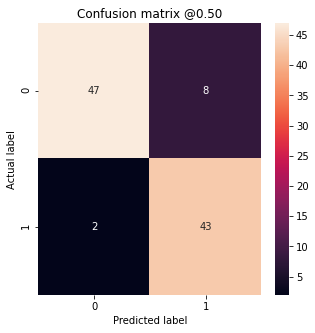

In [9]:
#test plot cm
gapnet.plot_cm(gapnet_model.val_y_labels, gapnet_model.val_y_preds, 0.5)

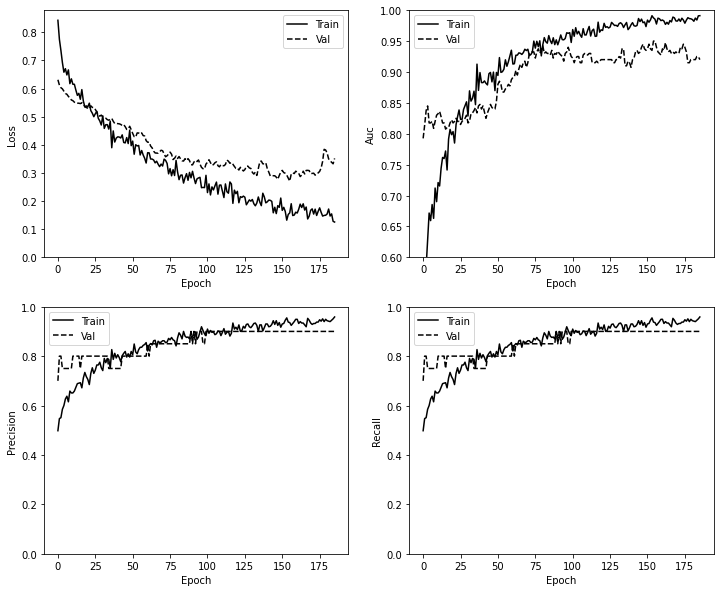

In [10]:
#havent test plot history
gapnet.plot_metrics(gapnet_model.history['clust_0'])

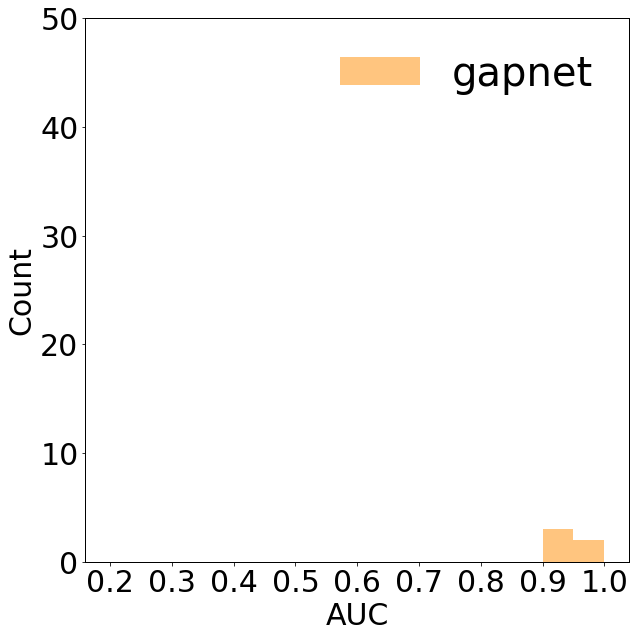

In [11]:
#test plot hist
gapnet.plot_hist(gapnet_model.val_aucs, 'gapnet', color='darkorange', alpha=0.5)